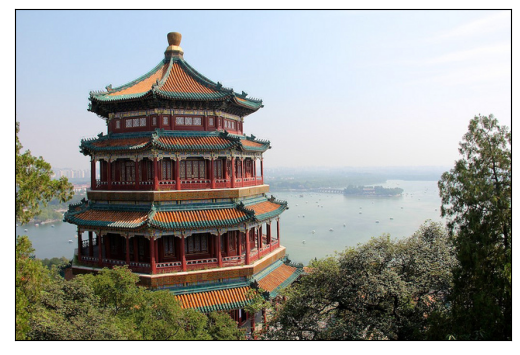

In [73]:
import pandas as pd
import numpy as mo
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
china =load_sample_image('china.jpg')
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [74]:
china.shape

(427, 640, 3)

In [75]:
data=china/255.0
data=data.reshape(427*640,3)

In [76]:
data.shape

(273280, 3)

In [77]:
def plot_pix(data,title,colors=None,N=1000000):
    if colors is None:
        colors=data
    rng = mo.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors= colors[i]
    R,G,B=data[i].T
    
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B,color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle("Hi",size=20)
    
    
    

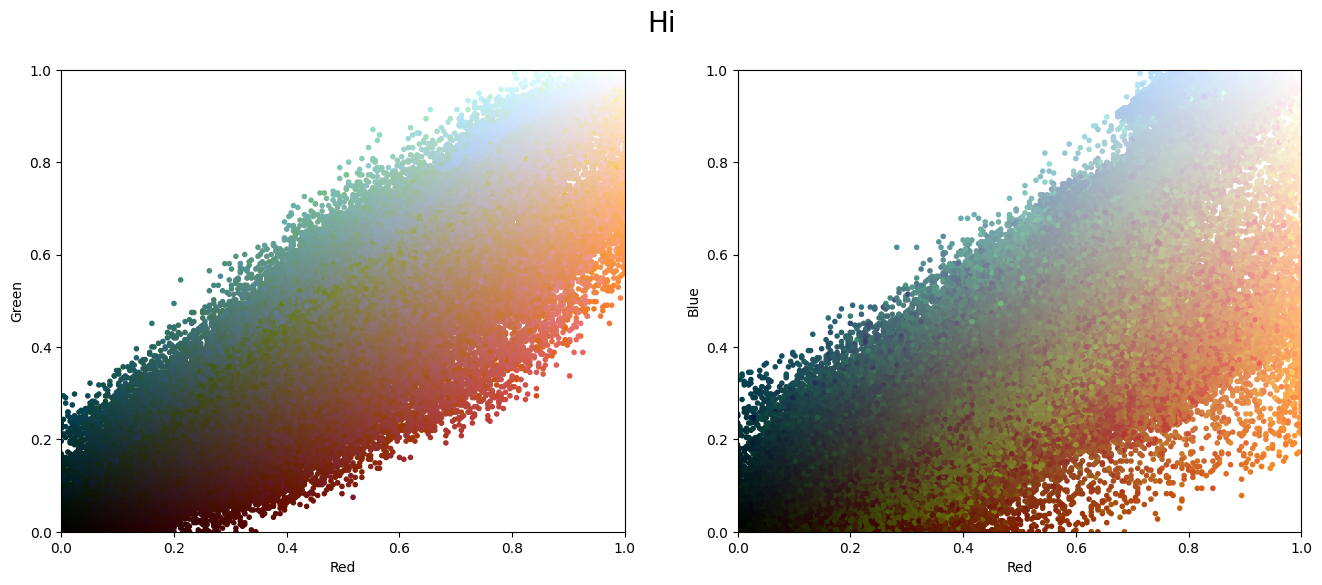

In [78]:
plot_pix(data,"hello")

In [79]:
import warnings
;

''

In [80]:
warnings.simplefilter('ignore')

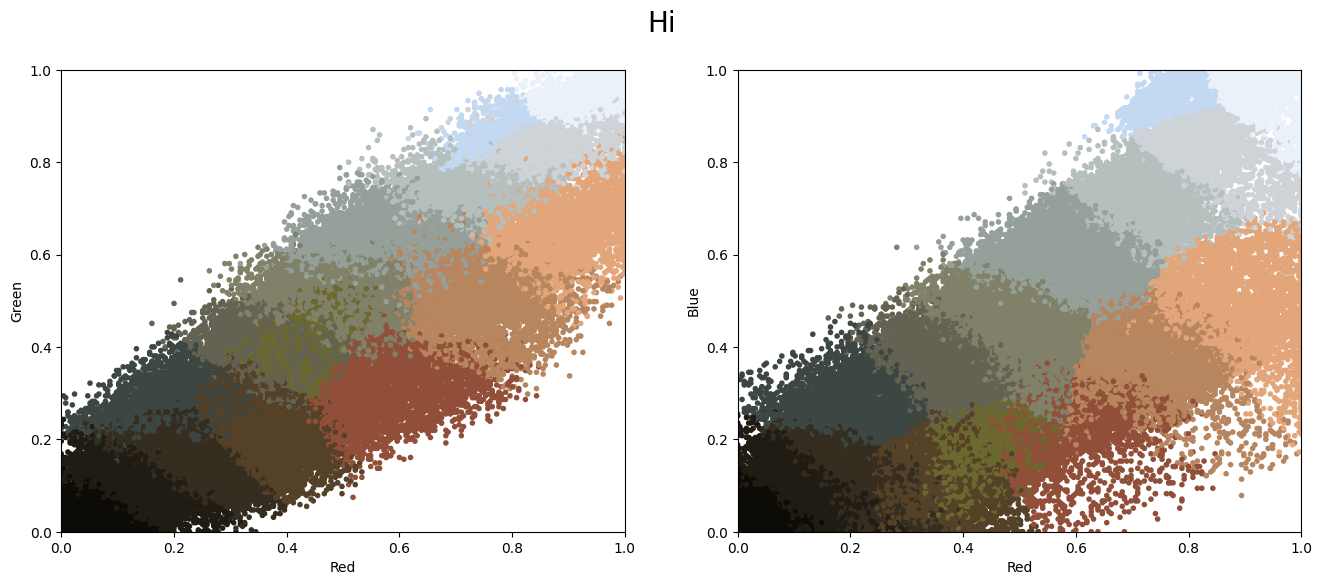

In [81]:
from sklearn.cluster import MiniBatchKMeans
Kmeans = MiniBatchKMeans(16)
Kmeans.fit(data)
new_colors = Kmeans.cluster_centers_[Kmeans.predict(data)]
plot_pix(data,colors=new_colors,title="Helloooo")

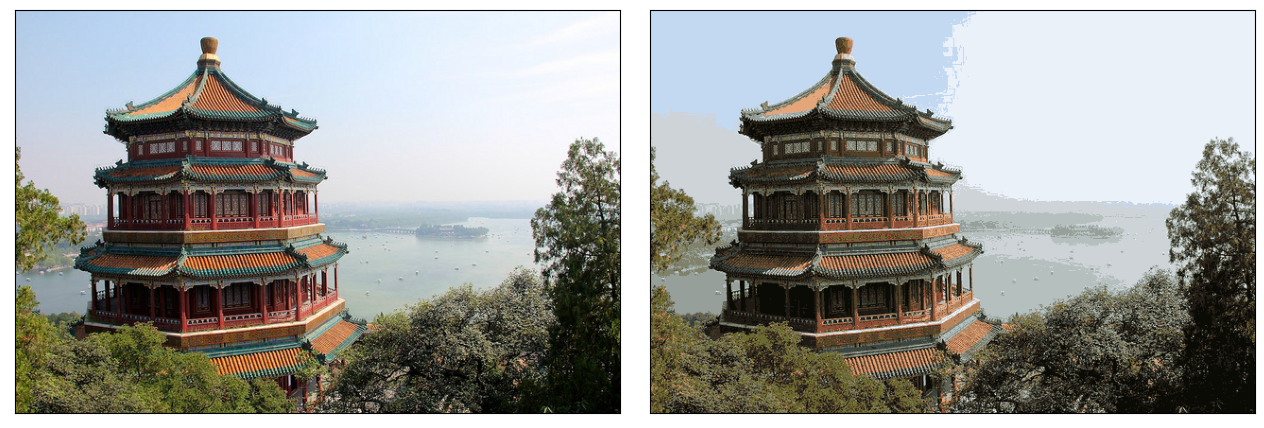

In [82]:
china_red = new_colors.reshape(china.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[1].imshow(china_red)